# Project MSI

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## default parameter
p_common = 0.8
sigma_v = 0.6
sigma_a = 3.1
sigma_p = 15
mu_p = 0

In [ ]:
def p_given_c1(x_v,x_a,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0): 
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """
    return 1 / (2 * np.pi * np.sqrt(sigma_v**2 * sigma_a**2 + sigma_v**2 * sigma_p**2 + sigma_a**2 * sigma_p**2)) * np.exp(-1/2 * ((x_v - x_a)**2 * sigma_p**2 + (x_v - mu_p)**2 * sigma_a**2 + (x_a - mu_p)**2 * sigma_v**2) / (sigma_v**2 * sigma_a**2 + sigma_v**2 * sigma_p**2 + sigma_a**2 * sigma_p**2))

def p_given_c2(x_v,x_a,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0): 
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    return 1/(2*np.pi*np.sqrt((sigma_v**2+sigma_p**2)*(sigma_a**2+sigma_p**2)))*np.exp(-1/2*((x_v-mu_p)**2/(sigma_v**2+sigma_p**2)+(x_a-mu_p)**2/(sigma_a**2+sigma_p**2)))
   
def P_C1_given_perception(x_v,x_a,p_common=0.8,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v,x_a,sigma_v,sigma_a,sigma_p,mu_p)
    p_given_c2_value = p_given_c2(x_v,x_a,p_common,sigma_v,sigma_a,sigma_p,mu_p)
    P_C1_given_perception =  p_given_c1_value*p_common/(p_given_c1_value*p_common+p_given_c2_value*(1-p_common))
    return P_C1_given_perception


### Plot probability of a common cause given noisy stimuli (default)

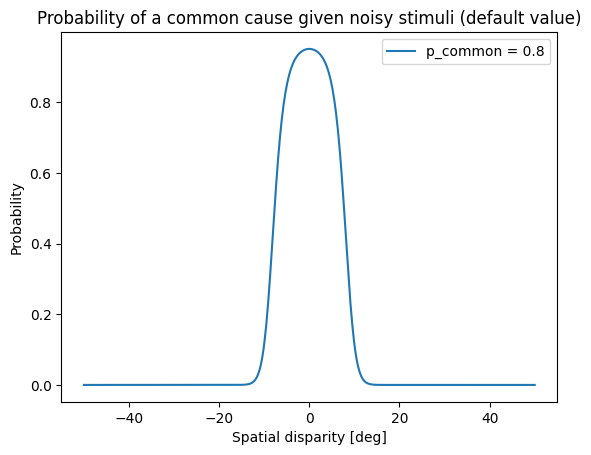

In [6]:
x_v_values = np.linspace(-50,50,500)
x_a_values = np.zeros(500)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values,x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label= f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary P_common

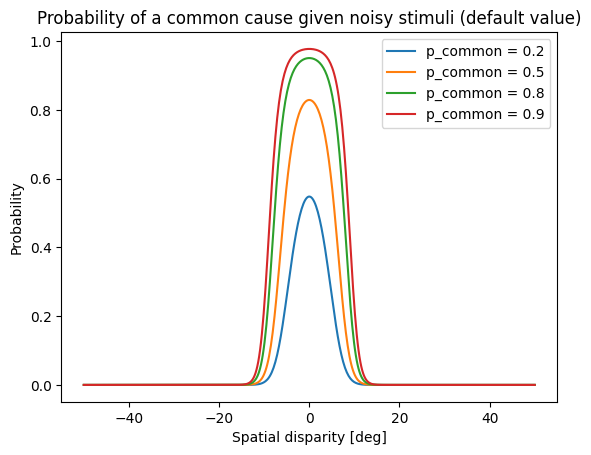

In [10]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference: 
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values
    
for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label= f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()